In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
# load the metadata
metadata_df = pd.read_csv("metadata.csv")
title_embeddings = np.load("metadata_title_embeddings.npz")["embeddings"]
keywords_embeddings = np.load("metadata_keywords_embeddings.npz")["embeddings"]

In [3]:
# Setting index
metadata_df.set_index("filename", inplace=True)
metadata_df.head(2)


,keywords,freesound_id,sound_link,manufacturer,license,title,description,num_downloads,geotag,start_time_s,end_time_s
filename,,,,,,,,,,,
617030.mp3,"atmosphere, general-noise, suburban, ambiance,...",617030,https://freesound.org/people/klankbeeld/sounds...,klankbeeld,https://creativecommons.org/licenses/by/4.0/,suburb night NL 1041PM 210415_0279.wav,Night in a suburban city. All sounds far. Tra...,65,51.7090740261 5.30657821347,15.6,43.535
637408.mp3,"jackhammer, construction, reflected",637408,https://freesound.org/people/kyles/sounds/637408/,kyles,http://creativecommons.org/publicdomain/zero/1.0/,construction jackhammer reflected5.flac,construction jackhammer reflected5\n\nrecorded...,23,NaN,209.8,232.356


## metadata_df General look

In [4]:
##  Shape of Data Frame
print("    Shape of Data Frame:")
print("DataFrame shape: \t", metadata_df.shape)
print("DataFrame rows: \t", len(metadata_df.index))
print("DataFrame columns: \t", len(metadata_df.columns))
print("DataFrame column names: \n", metadata_df.columns.to_list())

# # select a column
# metadata['keywords']
# metadata.loc[:, 'keywords']
# metadata[['title', 'keywords']]

# # select a row
# metadata.loc['450016.mp3']
# metadata.loc[['438858.mp3', '128446.mp3'], ["title", "manufacturer"]]

#select a row based on a condition
# (metadata['manufacturer'] == 'FullMetalJedi').head(n=3)


    Shape of Data Frame:
DataFrame shape: 	 (9026, 11)
DataFrame rows: 	 9026
DataFrame columns: 	 11
DataFrame column names: 
 ['keywords', 'freesound_id', 'sound_link', 'manufacturer', 'license', 'title', 'description', 'num_downloads', 'geotag', 'start_time_s', 'end_time_s']


## Annotations file

In [5]:
annotations = pd.read_csv("annotations.csv")
# making duration column
# annotations["duartion"] = annotations["offset"] - annotations["onset"]
annotations.head(1)


,task_id,filename,annotator,text,onset,offset,filename_unsafe
0,161977861,560761.mp3,5945971035380930099053858595454362549806990533...,bird twitters nearby with a high pitch two times,16.552368,17.271435,560761_tufted titmouse calling.mp3


In [6]:
print("    Shape of annotation:")
print("DataFrame shape: \t", annotations.shape)
print("DataFrame rows: \t", len(annotations.index))
print("DataFrame columns: \t", len(annotations.columns))
print("DataFrame column names: \n", annotations.columns.to_list())

# num annotaors for each audio recording
num_annotators = annotations.groupby("filename")["annotator"].nunique()
print(f'\n number of Annotators (each one annotatd many times): {len(num_annotators)}')  

    Shape of annotation:
DataFrame shape: 	 (35826, 7)
DataFrame rows: 	 35826
DataFrame columns: 	 7
DataFrame column names: 
 ['task_id', 'filename', 'annotator', 'text', 'onset', 'offset', 'filename_unsafe']

 number of Annotators (each one annotatd many times): 9026


In [7]:
# # filtering files with more than 1 annotator
# multi_annotators = num_annotators[num_annotators > 1]
# print(f'number of Annotators (each one annotatd many times): {len(multi_annotators)}')

# # Filter metadata_df and annotations using multi_annotators
# filtered_metadata = metadata_df.loc[multi_annotators]
# filtered_annotations = annotations[annotations["filename"].isin(multi_annotators)]






## 2. Annotation Quality

## Use the complete data set (or a subset) to address the following points quantitatively.

(a) How many annotations did we collect per file? \
    How many distinct sound events per file?

In [8]:
# annotation count per task/file
annotation_counts = annotations["task_id"].value_counts()
print("Min: ", annotation_counts.min())
print("Max: ", annotation_counts.max())
print("Mean: ", annotation_counts.mean())
print("Median: ", annotation_counts.median())



# ANSWER
"""- max annotation count is 96 per file, min is 1, the mean is ~ 4,
 But most files have 2-7 annotations (more density in this range).
- I took a look at 10 samples... --> most events had 1-4 different sound events."""

Min:  1
Max:  96
Mean:  3.9692000886328387
Median:  2.0


'- max annotation count is 96 per file, min is 1, the mean is ~ 4,\n But most files have 2-7 annotations (more density in this range).\n- I took a look at 10 samples... --> most events had 1-4 different sound events.'

##  (b) How detailed are the text annotations? How much does the quality of annotations vary between different annotators?

In [9]:
"""
Took 10 samples.
Created 10 lists of annotation of 10 different files.
"""

# first group the data by filename
grouped_by_filename = annotations.groupby("filename")

# get 10 random filenames from the grouped data
subset_filenames = list(grouped_by_filename.groups.keys())[100:110]

#loop over each group of each file and get the annotations in lists
annotations_list = []
for filename in subset_filenames:
    annotations_list.append(grouped_by_filename.get_group(filename)["text"].to_list())
# print the annotations for each file
for i, filename in enumerate(subset_filenames):
    print(f"Annotations for {filename}:")
    for j, annotation in enumerate(annotations_list[i]):
        print(f"{j + 1}: {annotation}")
    print("\n")


Annotations for 109434.mp3:
1: A loud police-siren goes on and off in a rhythmic pattern neither fading nor increasing.


Annotations for 109793.mp3:
1: A string instrument gets very deep note plucked with long decay


Annotations for 110129.mp3:
1: sound of a bus engine


Annotations for 110133.mp3:
1: continuous alarm of a cardreader next to a door, repeated sound with 500 milliseconds beep and 500 ms pause


Annotations for 110210.mp3:
1: A person close-by laughing in a lobby.
2: A baby repeatedly and faintly crying in a lobby
3: A baby faintly repeatedly crying in a lobby
4: A clear and very loud cry from a child in a lowly crouded lobby.


Annotations for 110219.mp3:
1: brass band playing continuously
2: brass band playing continuously


Annotations for 110260.mp3:
1: Rhythmic trumpets are heard clearly, their bright, brassy sound cutting through the air with a lively and energetic tune.
2: Rhythmic trumpets are heard clearly, their bright, brassy sound cutting through the air wit

In [10]:
# second_file = annotations.loc["127606.mp3"]
# num_annotators = second_file["annotator"].nunique()

# print(f'WE have ({len(second_file)}) annotations from ({num_annotators}) annotators for 127606.mp3')

# num_annotators = second_file["annotator"].nunique()
# print(f'WE have ({num_annotators}) annotators for 127606.mp3')

# annotations_2nd_file = second_file["text"].to_list()
# for ann in annotations_2nd_file: #print the annotations
#     print(ann)

# second_file.head(1)


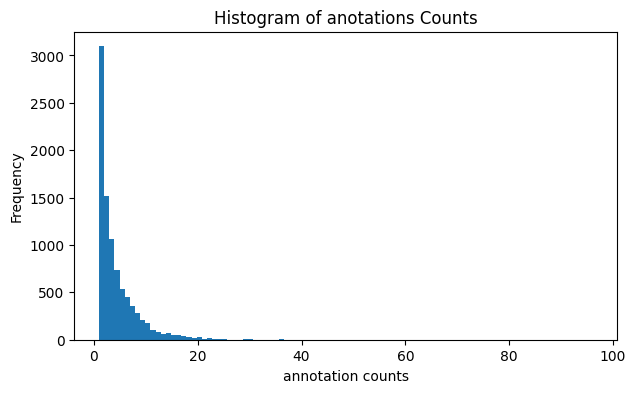

In [11]:
plt.title("Histogram of anotations Counts")
annotation_counts.plot.hist(bins=annotation_counts.max(), figsize=(7, 4))
plt.xlabel("annotation counts")
plt.show()
# # another plot with zoom on x-axis
# plt.title("ZOOM Histogram of anotations Counts")
# annotation_counts.plot.hist(bins=annotation_counts.max(), figsize=(7, 4))
# plt.xlim(0, 20)
# plt.xlabel("annotation counts")
# plt.show()


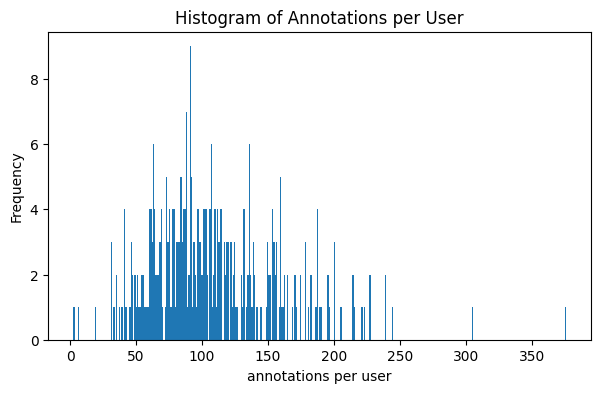

In [12]:
# group by number of annotations that each user did for each task/file
annotations_per_user = annotations.groupby("annotator")["task_id"].count()
annotations_per_user 
# plot
plt.title("Histogram of Annotations per User")
annotations_per_user.plot.hist(bins=annotations_per_user.max(), figsize=(7, 4))
plt.xlabel("annotations per user")
plt.show()


In [13]:
annotations = pd.read_csv("annotations.csv")
annotations[["filename","text"]].head(20)

,filename,text
0,560761.mp3,bird twitters nearby with a high pitch two times
1,240538.mp3,A cow bell clinging repeatedly
2,660337.mp3,A child speaks with a high-pitched voice
3,725686.mp3,A high pitch meowing coming from a cat
4,97606.mp3,An extremely loud brushing sound on a construc...
5,707789.mp3,licking and eating sound
6,501826.mp3,"A powerful cymbal crash with a bright, metalli..."
7,141704.mp3,crowd of people howling in arena
8,463807.mp3,Multiple ship horns
9,570488.mp3,An alarm siren sounding outdoors under windy c...


In [14]:
duplicates = annotations.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")
annotations[duplicates].head(10)


Number of duplicate rows: 141


,task_id,filename,annotator,text,onset,offset,filename_unsafe
1212,161978343,729186.mp3,5560510890581392803743942761910818323546111204...,A kitten meows very protractedly one time clos...,14.616757,15.798844,729186_Young_Kitty_Meowing 3.mp3
3700,161976781,159322.mp3,8926896165619677042001572601386787190420972763...,"Noisy, textured beep with a grainy edge, blend...",0.907811,1.347075,159322_dont you tell me - beeps 2wav.mp3
4159,161977676,394707.mp3,7199917567709710204485192252039334277832060890...,A flok of birds singing outside.,0.000000,23.668390,394707_170527_0032 dawsholm park with jesswav.mp3
6823,161978343,729186.mp3,5560510890581392803743942761910818323546111204...,"A ball kicking the ground one time, distantly.",0.000000,0.339207,729186_Young_Kitty_Meowing 3.mp3
6828,161984876,482337.mp3,3687879004483607437843305961928520180301694036...,People talking loudly in a constant pattern in...,18.182063,20.676553,482337_Conversation in Class roomwav.mp3
8267,161983957,124678.mp3,1000854762852742563558281041488243758990786435...,a child is meowing,10.685926,11.929870,124678_noise doesnt exist_sound workshops_1607...
8581,161976946,98007.mp3,7526205831694568980367141074683662123375335303...,"start race bleeps, first 3 repeated low pitche...",18.292501,22.090152,98007_Start race bleeps 2wav.mp3
8783,161978452,629649.mp3,2511836030875594054249018396648810123064624225...,metal gate screeching,14.602927,17.754497,629649_Screeching metal.mp3
9588,161978486,116483.mp3,1847409964593900791579168861090982009818939233...,"A short, sharp, high-pitched bark.",0.075945,0.655022,116483_DogBarkPapillon01wav.mp3
10018,161978488,116485.mp3,2999735693560213149163242311436710771999021040...,A dog is barking furiously.,9.054397,9.800053,116485_DogBarkPapillon03wav.mp3


In [15]:
print(annotations.info())
print(annotations.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35826 entries, 0 to 35825
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   task_id          35826 non-null  int64  
 1   filename         35826 non-null  object 
 2   annotator        35826 non-null  object 
 3   text             35826 non-null  object 
 4   onset            35826 non-null  float64
 5   offset           35826 non-null  float64
 6   filename_unsafe  35826 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.9+ MB
None
            task_id         onset        offset
count  3.582600e+04  35826.000000  35826.000000
mean   1.619836e+08      7.519307     14.833223
std    4.744002e+03      7.580258      8.018508
min    1.619765e+08      0.000000      0.088519
25%    1.619792e+08      0.029315      7.992713
50%    1.619837e+08      5.619811     15.470293
75%    1.619872e+08     13.266922     21.105678
max    1.621615e+08     29.

## Annotattion Quality
\
(a) How precise are the temporal annotations?

- The annotations are precise in generall (by taking look into subset)

(b) How similar are the text annotations that correspond to the same region?

- same files tend to have the same meaning for the corresponding parts of audio.

 Use the complete data set (or a subset) to address the following points quantitatively.

(a) How many annotations did we collect per file? How many distinct sound events per file?

- max annotation count is 96 per file, min is 1, the mean is 4, But most files have 2-7 annotations (more density in this range).
- I took a look at 10 samples... --> most events had 1-4 different sound events.

 (b) How detailed are the text annotations? How much does the quality of annotations vary between
 different annotators?

 - Most text annotations have adjectives describing the sound and the closeness of it (background, in distance....) which follows the annoting criteria.
 - In General, annotaters gave good & complete sentences as spesified in task 1. There were, of course, some annotations with lower quality (less describing words) but still correct description. 

 (c) Are there any obvious inconsistencies, outliers, or poor-quality annotations in the data? Propose a simple method to filter or fix incorrect or poor-quality annotations (e.g., remove outliers, typos, or
 spelling errors).

 - The data seems to be clean with no outliers or poor-quality annotations
 - However, there should be some methods to filter the data
 - Method could be : Algorithm that checks if some sentences have same meaning (Natural language Processing - NLP)
 . In addition, remove null values/ typos /duplicats, remove onset at 29 because this is the end of audio and annotations that looks unlogical or meaningless

# Exercise 4

Text Features (6 points): Load and analyze the text features of the annotations
(file: annotations text embeddings.npy):

(a) Cluster the text features. Can you find meaningful clusters?

(b) Design a labeling function1 for classes dog and cat. Do the annotations labeled as dog or cat sounds
form tight clusters in the text and audio feature space?

(c) How well do the audio feature clusters align with text clusters?